## COVID-19 Charts

Description


In [1]:
import sys
# Install required packages
#!{sys.executable} -mpip -q install matplotlib seaborn statsmodels pandas publicdata metapack

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import metapack as mp
import rowgenerators as rg
import publicdata as pub
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/jhu.edu-covid19.csv')

# Create Dataframes

confirmed_df = pkg.resource('confirmed').dataframe()
deaths_df = pkg.resource('deaths').dataframe()
recovered_df = pkg.resource('recovered').dataframe()

In [3]:
pkg

# COVID-19 Data
`jhu.edu-covid19-2.4.28` Last Update: 2020-06-08T15:43:13

_COVID 19 cases data from Johns Hopkins, augmented and reformtted_


This dataset processed and augments the COVID-19 data provided by Johns Hopkins
University Center for Systems Science and Engineering (JHU CSSE). [The source
data is checked into Github
daily.](https://github.com/CSSEGISandData/COVID-19/) and is collected from a
variety of sources.

This dataset reformats the data into tidy format, with dates expressed as
values instead of column headings, and adds several fields that are useful for
analysis.

The 'rate_t5d' column is the growth date from 5 days before the observation to
the observation. For example, for a row with a current observation of value
x_5, and a past observation of x_0, the rate_t5d is calculated as
e^((log(x_5)-log(x_0)) / 5)-1 . The result is that x_5 = x_0 * (1+rate_t5d)^5,
and rate_t5d from the previous 5 days

## Caveats

* China's minimum cases in the dataset is 548, so it's value for days sincle
  100 cases is shifted by 6 days. It's just a guess, but it looks good. 
* Countries that haven't reached 100 cases yet will have a days since 100 cases
  value that is always negative.
## Documentation Links

* [John Hopkins Project Homepage](https://systems.jhu.edu/research/public-health/ncov/) 

 
## Notes

* Version 2.x: The upstream source changed the data formats on 3/22
* Version 2.x: Country values that are aggregated from provinces now have a province value of 'aggregate'
## Contacts

* **Origin** [John Hopkins University Center for Systems Science and Engineering](https://systems.jhu.edu/)
* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [confirmed](http://library.metatab.org/jhu.edu-covid19-2.4.28/data/confirmed.csv)**. Confirmed Non-US cases by date and country
* ** [deaths](http://library.metatab.org/jhu.edu-covid19-2.4.28/data/deaths.csv)**. Non-US Death cases by date and country
* ** [recovered](http://library.metatab.org/jhu.edu-covid19-2.4.28/data/recovered.csv)**. Non-US recoveries cases by date and country
* ** [confirmed_us](http://library.metatab.org/jhu.edu-covid19-2.4.28/data/confirmed_us.csv)**. Confirmed US cases by date and country
* ** [deaths_us](http://library.metatab.org/jhu.edu-covid19-2.4.28/data/deaths_us.csv)**. US Death  cases by date and country

## References
<ul><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/">ts_base_url</a></strong>. Base URL for time series data</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv">confirmed_ts_source</a></strong>. Source for time series of confirmed cases, excluding US</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv">death_ts_source</a></strong>. Source for time series of deaths, excluding US</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv">recov_ts_source</a></strong>. Source for time series of recoveries, excluding US</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">confirmed_ts_us_source</a></strong>. Source for time series of confirmed cases, US Only</li><li> <strong><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv">death_ts_us_source</a></strong>. Source for time series of deaths, US Only</li><ul>

In [4]:
deaths_us = pkg.resource('deaths_us').dataframe()
deaths_us = deaths_us.dropna(subset=['fips'])
deaths_us['fips'] = deaths_us.fips.astype(int)

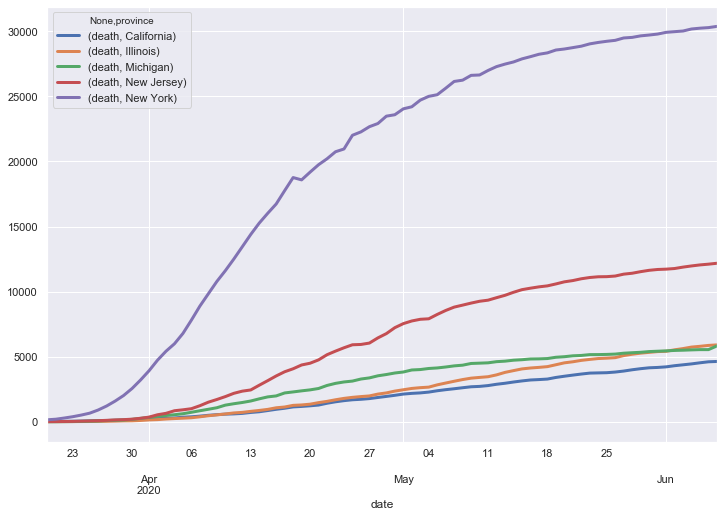

In [5]:
t = deaths_us[deaths_us.province.isin(('California','New York','Michigan','Illinois','New Jersey'))]
#t = deaths_df
t = t[['province','date','death']]
t = t.groupby(['date','province']).sum().unstack()
t.loc['2020-03-20':].plot(figsize=(12,8), linewidth=3);

In [6]:
confirmed_us = pkg.resource('confirmed_us').dataframe()
confirmed_us = confirmed_us.dropna(subset=['fips'])
confirmed_us['fips'] = confirmed_us.fips.astype(int)

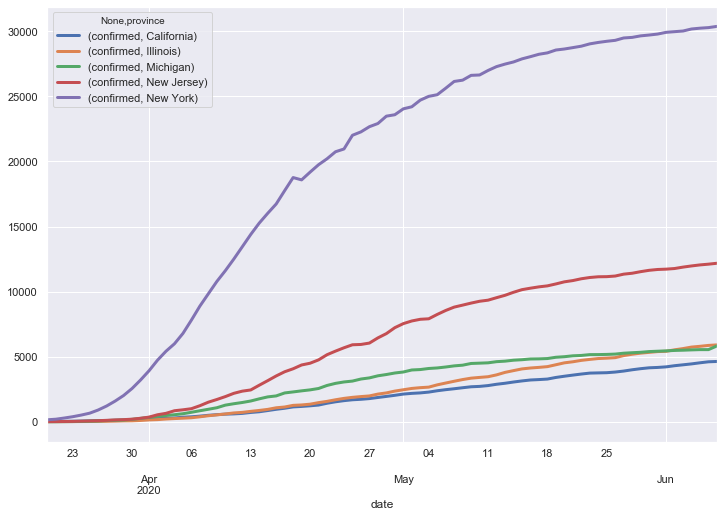

In [7]:
t = confirmed_us[confirmed_us.province.isin(('California','New York','Michigan','Illinois','New Jersey'))]

t = t[['province','date','confirmed']]
t = t.groupby(['date','province']).sum().unstack()
t.loc['2020-03-20':].plot(figsize=(12,8), linewidth=3);

In [8]:
deaths_us.groupby(['date','province']).death.max().loc[('2020-04-16',)].sort_values(ascending=False)

province
New York                    13374
Michigan                      884
Illinois                      722
New Jersey                    668
California                    457
Connecticut                   406
Washington                    312
Louisiana                     302
Pennsylvania                  264
Massachusetts                 221
Florida                       183
Indiana                       164
Nevada                        115
Wisconsin                     114
Rhode Island                   84
Georgia                        83
District of Columbia           81
Virginia                       77
Maryland                       72
Missouri                       66
Arizona                        64
Colorado                       63
Texas                          63
Puerto Rico                    56
Kentucky                       56
Minnesota                      46
Ohio                           42
Kansas                         34
Tennessee                      32
New H

In [9]:
t = deaths_us.query("date=='2020-04-16'")
t = t.groupby('province').sum()[['death']]
(t/t.sum()*100).sort_values('death',ascending=False)

,death
province,
New York,48.046987
New Jersey,10.103969
Michigan,5.698202
Louisiana,3.320122
Massachusetts,3.179390
Illinois,3.078867
Connecticut,2.788787
California,2.745706
Pennsylvania,2.415417


AttributeError: 'DataFrame' object has no attribute 'location'

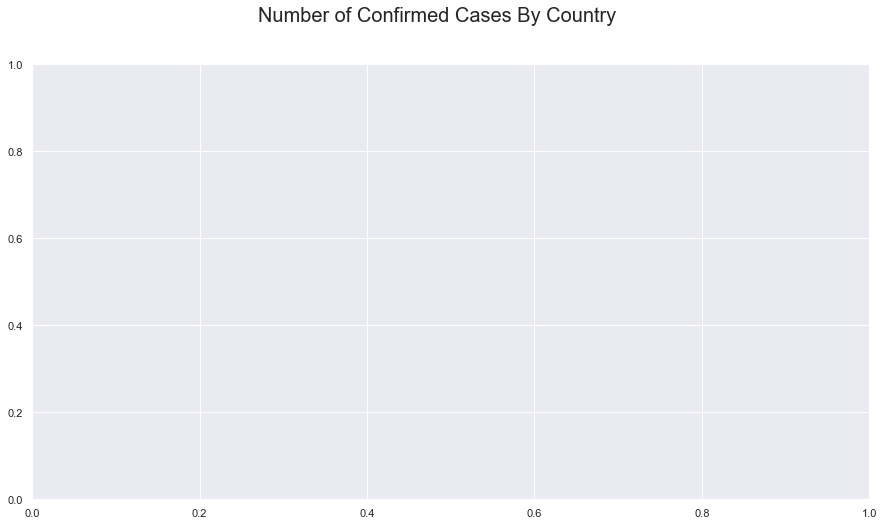

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Number of Confirmed Cases By Country', fontsize=20)


t = t[t.location.isin( ['Italy','US','Germany','France', 'United Kingdom','China'])]
display(t.head())
sns.lineplot(ax=ax, x='days_100',y='confirmed_log', data=t, hue='location', ci=None)
ax.set_xlabel('Days since first 100 cases', fontsize=18)
ax.set_ylabel('Log Number of Cases', fontsize=18)